<a href="https://colab.research.google.com/github/yakkunn7422/public_colab/blob/main/torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# ZIPファイルの解凍
import os

sample_dir = "/content/sample_data"
os.chdir(sample_dir)
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/2024_AIContest2/Thema1/train_images.zip') as myzip:
     myzip.extractall()

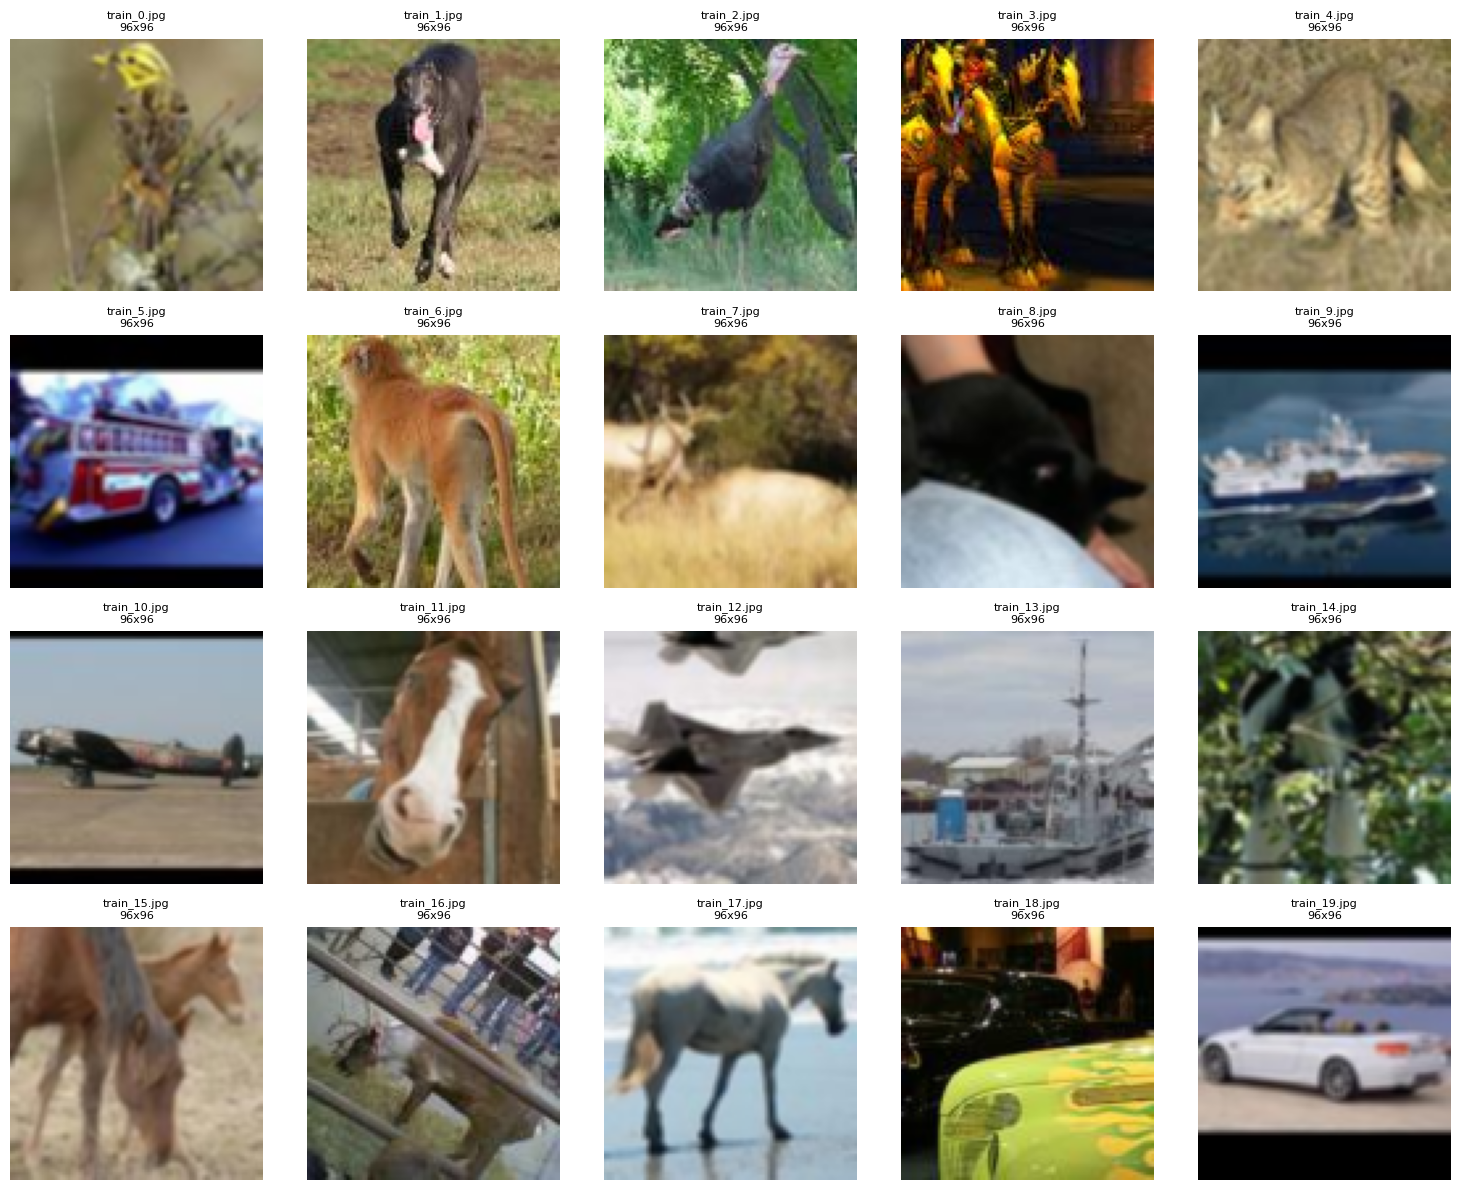

In [36]:
# https://www.kikagaku.co.jp/kikagaku-blog/pytorch-torchvision/#i-23
# + NGS

import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from natsort import natsorted

# 画像が格納されているディレクトリパス
directory_path = "/content/sample_data/train_images"  # ここを対象ディレクトリのパスに置き換えてください
MAX_SHOW_IMAGES = 20 # 表示させる画像数
MAX_PER_ROW     = 5  # 1行に表示させる画像数

# 画像を表示するための変換を定義
transform = transforms.Compose([
#    transforms.Resize(96),                 # リサイズ
#    transforms.CenterCrop(size=(20, 20)),  # 中央切り抜き : CenterCrop
#    transforms.RandomCrop(size=(80)),   # ランダム切り抜き : RandomCrop
#    transforms.RandomHorizontalFlip(p=0.5), # 左右反転 : RandomHorizontalFlip pは適用される確率
#    transforms.RandomVerticalFlip(p=1.0),   # 上下反転 : RandomVerticalFlip
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # ぼかす : GaussianBlur
    transforms.ToTensor(),  # PIL画像をTensorに変換

])

# 指定ディレクトリから画像ファイルを取得
def get_image_paths(directory, n=20):
    supported_formats = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')  # 読み込み可能な画像形式
    all_files = os.listdir(directory)
    image_paths = [os.path.join(directory, file) for file in all_files if file.lower().endswith(supported_formats)]
    image_paths = natsorted(image_paths)
    return image_paths[:n]  # 指定された枚数だけ取得

# 画像を表示する関数
def show_images(image_paths, count=5):
    n_images = len(image_paths)
    n_cols = count  # 1列に表示する画像の数
    n_rows = (n_images + n_cols - 1) // n_cols  # 行の数を計算

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

    for idx, image_path in enumerate(image_paths):
        row, col = divmod(idx, n_cols)
        image = Image.open(image_path)
        image_tensor = transform(image)

        # グレースケールのチェック
        if image_tensor.shape[0] == 1:
            image_np = image_tensor.squeeze(0).numpy()
            axs[row, col].imshow(image_np, cmap='gray')
        else:
            image_np = image_tensor.permute(1, 2, 0).numpy()
            axs[row, col].imshow(image_np)

        # ファイル名と画像サイズの表示
        file_name = os.path.basename(image_path)
        axs[row, col].set_title(f'{file_name}\n{image.size[0]}x{image.size[1]}', fontsize=8)
        axs[row, col].axis('off')  # 軸を非表示

    # 隠れているaxesをオフにする
    for idx in range(n_images, n_rows * n_cols):
        fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.show()

# 関数を呼び出して画像を表示
image_paths = get_image_paths(directory_path, n=MAX_SHOW_IMAGES)
show_images(image_paths, count=MAX_PER_ROW)

